The contents of this course including lectures, labs, homework assignments, and exams have all been adapted from the [Data 8 course at University California Berkley](https://data.berkeley.edu/education/courses/data-8). Through their generosity and passion for undergraduate education, the Data 8 community at Berkley has opened their content and expertise for other universities to adapt in the name of undergraduate education.

In [3]:
#!pip install datascience
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

# Chapter 11 Testing Hypotheses

Data scientest often times have to answer yes and no questions. How we answer these questions often depends on the data we have. In this chapter we try to answer yes-no questions using random samples and emperical distributions.

### Case Study: Swain vs. Alabama 1965
* Talladega County, Alabama
* Robert Swain, black man convicted of crime
* Appeal: one factor was all-white jury
* Only men 21 years or older were allowed to serve
* 26% of this population were black
* Swain’s jury panel consisted of 100 men
* 8 men on the panel were black
* Appeal went to Supreme Court and concluded "the overall percentage disparity has been small andreflects no studied attempt to include or exclude a specified number of Negroes”
* The Supreme Court denied Robert Swain’s appeal

#### Question: Is 8/100 a realistic outcome if the jury panel selection process was unbiased?

To answer the question we will simulate random selection:

* We can simulate data based on the model. That is, we can simulate drawing at random from a population of whom 26% are Black.
* Our simulation will show what a panel would be like if it were selected at random.
* We can then compare the results of the simulation with the composition of an actual jury panel.
* If the results of our simulation are not consistent with the composition of the panel in the trial, that will be evidence against the model of random selection. Therefore, it will be evidence against the fairness of the trial.


In [4]:
sample_size = 100
eligible_population = [0.26, 0.74]

#### sample_proportions() funtion:
sample_proportions() funtion samples at random with replacement from a categorical distribution and returns the proportions of sampled elements in each category.

The sample_proportions function takes two arguments:
* the sample size
* the distribution of the categories in the population, as a list or array of proportions that add up to 1

It returns an array containing the distribution of the categories in a random sample of the given size taken from the population. That’s an array consisting of the sample proportions in all the different categories, in the same order in which they appeared in the population distribution.

In [17]:
# Run a few times. Do you ever see a sample of 0.08?
sample_proportions(sample_size, eligible_population).item(0)

0.24

In [18]:
def one_simulated_count():
    return sample_size * sample_proportions(sample_size, eligible_population).item(0)

In [19]:
counts = make_array()
repetitions = 10000
for i in np.arange(repetitions):
    counts = np.append(counts, one_simulated_count())

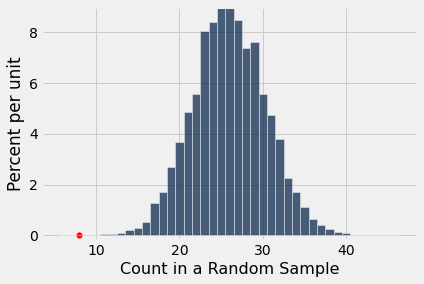

In [20]:
Table().with_column(
    'Count in a Random Sample', counts
).hist(bins = np.arange(5.5, 46.6, 1))
plots.ylim(-0.002, 0.09)
plots.scatter(8, 0, color='red', s=30);

## Another Case Study: Jury Selection in Alameda CA

In 2010, the American Civil Liberties Union (ACLU) of Northern California presented a [report](https://www.aclunc.org/sites/default/files/racial_and_ethnic_disparities_in_alameda_county_jury_pools.pdf) on jury selection in Alameda County, California. The report concluded that certain racial and ethnic groups are underrepresented among jury panelists in Alameda County, and suggested some reforms of the process by which eligible jurors are assigned to panels. In this section, we will analyze the data provided by the ACLU.

 The ACLU compiled data on the composition of the jury panels in 11 felony trials in Alameda County in the years 2009 and 2010. In those panels, the total number of people who reported for jury service was 1453. The ACLU gathered demographic data on all of these prosepctive jurors, and compared those data with the composition of all eligible jurors in the county.

The data are tabulated below in a table called jury. In each category, the first numerical value is the proportion of all eligible juror candidates in that category. The second value is the proportion of people in that category among those who appeared for the process of selection into the jury.

The labels for the different categories are taken from the ACLU report, which says, “The category “other” includes people who identified as mixed race without identifying one primary racial identity, and individuals who did not identify a race or ethnicity.” The label Asian/PI means “Asian or Pacific Islander.” The label Black/AA means “Black or African-American.”

In [21]:
jury = Table().with_columns(
    'Ethnicity', make_array('Asian/PI', 'Black/AA', 'Caucasian', 'Hispanic', 'Other'),
    'Eligible', make_array(0.15, 0.18, 0.54, 0.12, 0.01),
    'Panels', make_array(0.26, 0.08, 0.54, 0.08, 0.04)
)

jury

Ethnicity,Eligible,Panels
Asian/PI,0.15,0.26
Black/AA,0.18,0.08
Caucasian,0.54,0.54
Hispanic,0.12,0.08
Other,0.01,0.04


In [ ]:
jury.barh('Ethnicity')

What if we select a random sample of 1,453 people from the population of eligible jurors? Will the distribution of their ethnicities look like the distribution of the panels above?

We can answer these questions by using sample_proportions and augmenting the jury table with a column of the proportions in our sample.

**Technical note.** Random samples of prospective jurors would be selected without replacement. However, when the size of a sample is small relative to the size of the population, sampling without replacement resembles sampling with replacement; the proportions in the population don’t change much between draws. The population of eligible jurors in Alameda County is over a million, and compared to that, a sample size of about 1500 is quite small. We will therefore sample with replacement.

In the cell below, we sample at random 1453 times from the distribution of eligible jurors, and display the distribution of the random sample along with the distributions of the eligible jurors and the panel in the data.

In [22]:
eligible_population = jury.column('Eligible')
sample_distribution = sample_proportions(1453, eligible_population)
panels_and_sample = jury.with_column('Random Sample', sample_distribution)
panels_and_sample

Ethnicity,Eligible,Panels,Random Sample
Asian/PI,0.15,0.26,0.156917
Black/AA,0.18,0.08,0.194081
Caucasian,0.54,0.54,0.516173
Hispanic,0.12,0.08,0.122505
Other,0.01,0.04,0.0103235


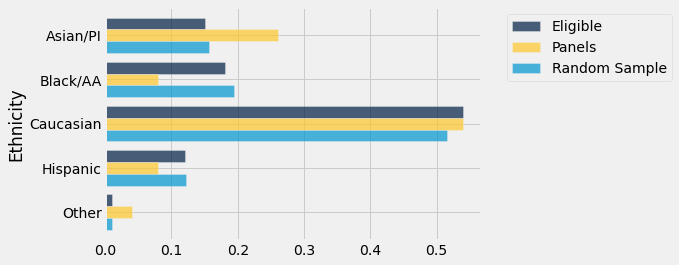

In [23]:
panels_and_sample.barh('Ethnicity')

 We need a statistic that will help us assess whether or not the model or random selection is supported by the data. A New Statistic: The Distance between Two Distributions 


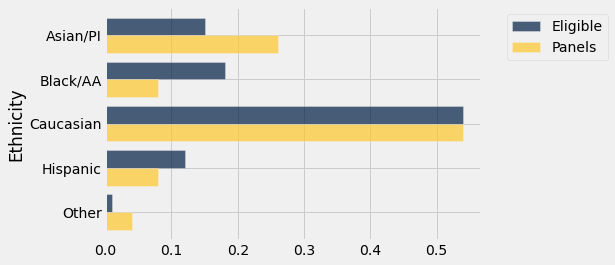

In [24]:
jury.barh('Ethnicity')

In [25]:
jury_with_diffs = jury.with_column(
    'Difference', jury.column('Panels') - jury.column('Eligible')
)
jury_with_diffs

Ethnicity,Eligible,Panels,Difference
Asian/PI,0.15,0.26,0.11
Black/AA,0.18,0.08,-0.1
Caucasian,0.54,0.54,0
Hispanic,0.12,0.08,-0.04
Other,0.01,0.04,0.03


In [26]:
jury_with_diffs = jury_with_diffs.with_column(
    'Absolute Difference', np.abs(jury_with_diffs.column('Difference'))
)

jury_with_diffs

Ethnicity,Eligible,Panels,Difference,Absolute Difference
Asian/PI,0.15,0.26,0.11,0.11
Black/AA,0.18,0.08,-0.1,0.1
Caucasian,0.54,0.54,0,0
Hispanic,0.12,0.08,-0.04,0.04
Other,0.01,0.04,0.03,0.03


In [27]:
jury_with_diffs.column('Absolute Difference').sum() / 2

0.14

This quantity 0.14 is the total variation distance (TVD) between the distribution of ethnicities in the eligible juror population and the distribution in the panels.

In general, the total variation distance between two distributions measures how close the distributions are. The larger the TVD, the more different the two distributions appear.

In [29]:
def total_variation_distance(distribution_1, distribution_2):
    return sum(np.abs(distribution_1 - distribution_2)) / 2

In [30]:
total_variation_distance(jury.column('Panels'), jury.column('Eligible'))

0.14

In the cell below we use the function to compute the TVD between the distributions of the eligible jurors and one random sample. Recall that eligible_population is the array containing the distribution of the eligible jurors, and that our sample size is 1453.

In the first line, we use sample_proportions to generate a random sample from the eligible population. In the next line we use total_variation_distance to compute the TVD between the distributions in the random sample and the eligible population

In [38]:
sample_distribution = sample_proportions(1453, eligible_population)
total_variation_distance(sample_distribution, eligible_population)

0.023296627666896046

Run the cell a few times and notice that the distances are quite a bit smaller than 0.14, the distance between the distribution of the panels and the eligible jurors.

We are now ready to run a simulation to assess the model of random selection.

In [42]:
# Simulate one simulated value of 
# the total variation distance between
# the distribution of a sample selected at random
# and the distribution of the eligible population

def one_simulated_tvd():
    sample_distribution = sample_proportions(1453, eligible_population)
    return total_variation_distance(sample_distribution, eligible_population)   

In [43]:
tvds = make_array()
repetitions = 5000
for i in np.arange(repetitions):
    tvds = np.append(tvds, one_simulated_tvd())

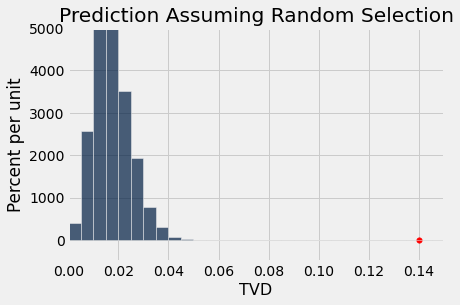

In [44]:
Table().with_column('TVD', tvds).hist(bins=np.arange(0, 0.2, 0.005))

# Plotting parameters; you can ignore this code
plots.title('Prediction Assuming Random Selection')
plots.xlim(0, 0.15)
plots.ylim(-5, 50)
plots.scatter(0.14, 0, color='red', s=30);

The simulation shows that the composition of the panels in the ACLU study is not consistent with the model of random selection. Our analysis supports the ACLU’s conclusion that the panels were not representative of the distribution provided for the eligible jurors.

### Another Case Study:  Mendel's Pea Plants

[Gregor Mendel](https://en.wikipedia.org/wiki/Gregor_Mendel) (1822-1884) was an Austrian monk who is widely recognized as the founder of the modern field of genetics. Mendel performed careful and large-scale experiments on plants to come up with fundamental laws of genetics.

Many of his experiments were on varieties of pea plants. He formulated sets of assumptions about each variety; these were his models. He then tested the validity of his models by growing the plants and gathering data.

For pea plants of a particular variety, Mendel proposed the following model.

For every plant, there is a 75% chance that it will have purple flowers, and a 25% chance that the flowers will be white, regardless of the colors in all the other plants.

To see whether his model was valid, Mendel grew 929 pea plants of this variety. Among these 929 plants, 705 had purple flowers.

We will use these data to perform a test of hypotheses and see if Mendel’s model looks good.

All statistical tests attempt to choose between two views of the world. Specifically, the choice is between two views about how the data were generated. These two views are called hypotheses.

**The null hypothesis.** This is a clearly defined model about chances. It says that the data were generated at random under clearly specified assumptions about the randomness. The word “null” reinforces the idea that if the data look different from what the null hypothesis predicts, the difference is due to nothing but chance.

From a practical perspective, **the null hypothesis is a hypothesis under which you can simulate data.**

In the example about Mendel’s model for the colors of pea plants, the null hypothesis is that the assumptions of his model are good: each plant has a 75% chance of having purple flowers, independent of all other plants.

Under this hypothesis, we can simulate random samples by using sample_proportions.

The alternative hypothesis. This says that some reason other than chance made the data differ from the predictions of the model in the null hypothesis.

In the example about Mendel’s plants, the alternative hypothesis is simply that his model isn’t good.

Keep in mind that the alternative doesn’t say how or why the model isn’t good. It just says the model isn’t good.

In order to decide between the two hypothesis, we must choose a statistic that we can use to make the decision. This is called the **test statistic.**

We will be comparing two categorical distributions: the one in Mendel’s model and the one we will get in our random sample. We want to see if these two distributions are close to each other or far apart. So a natural test statistic is the total variation distance (TVD).


The observed value of the test statistic is the value of the statistic you get from the data in the study, not a simulated value. Among Mendel’s 929 plants, 705 had purple flowers. The observed value of the test statistic was therefore




In [45]:
observed_statistic = abs ( 100 * (705 / 929) - 75)
observed_statistic

0.8880516684607045

In [46]:
mendel_proportions = make_array(0.75, 0.25)
mendel_proportion_purple = mendel_proportions.item(0)
sample_size = 929

In [47]:
def one_simulated_distance():
    sample_proportion_purple = sample_proportions(929, mendel_proportions).item(0)
    return 100 * abs(sample_proportion_purple - mendel_proportion_purple)

In [48]:
repetitions = 10000
distances = make_array()
for i in np.arange(repetitions):
    distances = np.append(distances, one_simulated_distance())

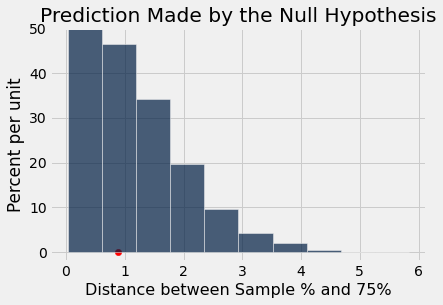

In [49]:
Table().with_column(
    'Distance between Sample % and 75%', distances
).hist()
plots.ylim(-0.02, 0.5)
plots.title('Prediction Made by the Null Hypothesis')
plots.scatter(observed_statistic, 0, color='red', s=40);

The observed statistic is like a typical distance predicted by the null hypothesis. The null hypothesis is Mendel’s model. So our test concludes that the data are consistent with Mendel’s model and we accept the null hypothesis.

In all of our examples of assessing models there has been no doubt about whether the data were consistent with the model’s predictions. They were either very far from what the model predicted, as in the examples about jury panels, or similar to what the model predicted, as in the example about Mendel’s model.

But outcomes are not always so clear cut. How far is “far”? Exactly what should “similar” mean? While these questions don’t have universal answers, there are some guidelines and conventions that you can follow.

Suppose someone grew another 929 plants of some related variety and wanted to see if Mendel’s model worked for plants of that variety too. What would you conclude if their observed distance came out to be 3.2 as shown below?

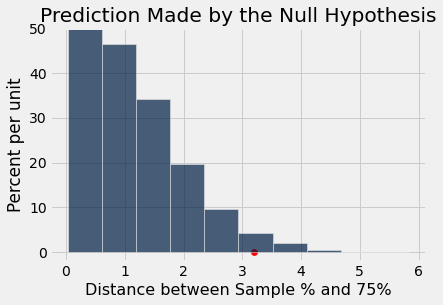

In [50]:
different_observed_statistic = 3.2
Table().with_column(
    'Distance between Sample % and 75%', distances
).hist()
plots.ylim(-0.02, 0.5)
plots.title('Prediction Made by the Null Hypothesis')
plots.scatter(different_observed_statistic, 0, color='red', s=40);

The conventions are based on the area in the tail, starting at the observed statistic (the red dot) and looking in the direction that makes us lean toward the alternative. In this example that’s the right side, because big distances favor the alternative which says that the model isn’t good.

If the area of the tail is small, the observed statistic is far away from the values most commonly predicted by the null hypothesis.

Remember that in a histogram, area represents percent. To find the area in the tail, we have to find the percent of distances that were greater than or equal to 3.2, where the red dot is. The array distances contains the averages for all 10,000 repetitions of random sampling under Mendel’s model, and different_observed_statistic is 3.2.

In [52]:
np.count_nonzero(distances >= different_observed_statistic) / repetitions

0.0266

We can conclude that if Mendel’s model were correct for these new plants, then there is about a 2.5% chance that the test statistic would be 3.2 or more.

That doesn’t seem like a big chance. If Mendel’s model is true for these plants, something quite unlikely has happened. This idea gives rise to the conventions.

This chance has an impressive name. It is called the observed significance level of the test. That’s a mouthful, and so it is commonly called the p-value of the test.

Definition: The p-value of a test is the chance, based on the model in the null hypothesis, that the test statistic will be equal to the observed value in the sample or even further in the direction that supports the alternative.

If a p-value is small, that means the tail beyond the observed statistic is small and so the observed statistic is far away from what the null predicts. This implies that the data support the alternative hypothesis more than they support the null.

How small is “small”? According to the conventions:

* If the p-value is less than 5%, it is considered small and the result is called “statistically significant.”

* If the p-value is even smaller – less than 1% – the result is called “highly statistically significant.”

By this convention, our p-value of 2.5% is considered small. So the conventional conclusion would be to reject the null hypothesis and say that Mendel’s model does not look good for the new plants. Formally, the result of the test is statistically significant.

Whether you use a conventional cutoff or your own judgment, it is important to keep the following points in mind.

* Always provide the observed value of the test statistic and the p-value, so that readers can decide whether or not they think the p-value is small.

* Don’t look to defy convention only when the conventionally derived result is not to your liking.

* Even if a test concludes that the data don’t support the chance model in the null hypothesis, it typically doesn’t explain why the model doesn’t work. Don’t make causal conclusions without further analysis, unless you are running a randomized controlled trial.
